# 다이아몬드 데이터셋

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/diamonds.csv',index_col=0)

```{admonition} Question 1
**carat과 price의 경향을 비교하기 위한 scatterplot그래프를 출력하시오**
```

In [2]:
import matplotlib.pyplot as plt

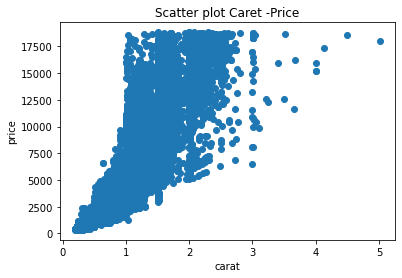

In [3]:
plt.scatter(df['carat'],df['price'])
plt.xlabel('carat')
plt.ylabel('price')
plt.title('Scatter plot Caret -Price')
plt.show()

```{admonition} Question 2
**carat과 price사이의 상관계수와 상관계수의 p-value값은?**
```

In [4]:
corr_by_pandas = df[['carat','price']].corr().iloc[0,1]

In [5]:
print(corr_by_pandas)

0.9215913011935697


In [6]:
from scipy import stats

In [7]:
corr_by_scipy ,pv= stats.pearsonr(df['carat'],df['price'])

In [8]:
print(corr_by_scipy)

0.9215913011934769


In [9]:
print(pv)

0.0


```{admonition} Question 3
**color에 따른 price 값의 분포는 아래와 같다.**
```

In [10]:
import seaborn as sns

<AxesSubplot:xlabel='color', ylabel='price'>

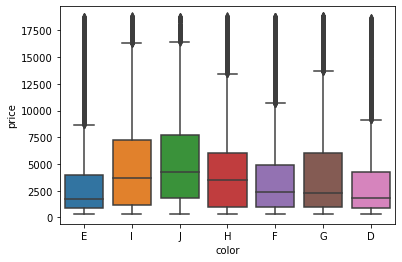

In [11]:
sns.boxplot(data=df,x='color',y='price')

```{admonition} Question 3-1
**Diamond의 평균가격은 3932로 알려져있다. 'H' color를 가지는 다이아몬드 집단의 평균에 대한 일표본 t검정을 시행하려한다. 통계량과 pvalue값을 구하시오. 유의수준 0.05에서 귀무가설 채택여부를 boolean 값으로 표현할 변수(hypo) 만들고 출력하시오**
```

In [12]:
H_prop = df[df['color'] == 'H']
static, pv = stats.ttest_1samp(H_prop['price'], 3932)

if pv<0.05:
    hypo = False
else:
    hypo = True

In [13]:
print(static)
print(pv)
print(hypo)

11.988997411117696
7.569973305218302e-33
False


```{admonition} Question 3-2
**그래프상에서 'F'와 'G'는 평균이 유사해보인다.이를 확인하기 위해 집단간 등분산(levene,fligner,bartlett) 검정을 시행 후 결과를 출력하고조건에 맞는 독립표본 t검정을 시행하라**
```

In [14]:
F = df[df['color'] == 'F']
G = df[df['color'] == 'G']

leve = stats.levene(F['price'], G['price'])
fli = stats.fligner(F['price'], G['price'])
bartlet= stats.bartlett(F['price'], G['price'])

In [15]:
print(leve)
print(fli)
print(bartlet)

LeveneResult(statistic=53.627886257416655, pvalue=2.511093007074788e-13)
FlignerResult(statistic=37.04347553879807, pvalue=1.155244880009172e-09)
BartlettResult(statistic=47.52732212008511, pvalue=5.424264079418252e-12)


등분산 조건 확인시 귀무가설 기각(p-value <0.05), 유의수준하에 'F와 G 집단간 분산은 같지 않다'

In [16]:
t_test_FG =stats.ttest_ind(G['price'], F['price'], equal_var = False)

In [17]:
t_test_FG

Ttest_indResult(statistic=5.045279980436125, pvalue=4.5670321227041464e-07)

독립표본 t검정 시행시 귀무가설 기각(p-value <0.05), 유의수준하에 'F와 G 집단간 평균은 같지 않다'

```{admonition} Question 3-3
**color 'F','G','D' 세집단의 price값들에 대해 anova분석을 시행하라.**
```

등분산검정

In [18]:
D = df[df['color'] == 'D']

levene = stats.levene(F['price'], D['price'], G['price'])
fligner =stats.fligner(F['price'], D['price'], G['price'])
bartlett =stats.bartlett(F['price'], D['price'], G['price'])

In [19]:
print(bartlett)
print(fligner)
print(levene)

BartlettResult(statistic=289.14364432535103, pvalue=1.634012581050329e-63)
FlignerResult(statistic=494.64591695585733, pvalue=3.881538382653518e-108)
LeveneResult(statistic=118.97521469312785, pvalue=3.557425577381817e-52)


정규성검정

In [24]:
print(FG)
print(FD)
print(GD)

KstestResult(statistic=0.06151941343574685, pvalue=1.852300346010811e-17)
KstestResult(statistic=0.09505504118130681, pvalue=6.994405055138486e-15)
KstestResult(statistic=0.12093708375978551, pvalue=2.0167762615717943e-54)


In [20]:
anova = stats.f_oneway(F['price'], D['price'], G['price'])

In [21]:
anova

F_onewayResult(statistic=101.1811790316069, pvalue=1.6513790091285713e-44)

세집단의 분산분석 시행결과 귀무가설을 기각하고 (p-value <0.05) 유의수준 하에서 세집단 중 어느 두집단의 평균은 같지 않다(정확한 검정을 위해서는 사후검정실시해야함)

```{admonition} Question 4
**연속형 변수(carat,depth,table,price,x,y,z) 각각의 이상치(1,3분위값에서 IQR*1.5 외의 값) 갯수를 데이터 프레임(변수명 ratio_df, 비율의 내림차순 정렬)으로 아래와 같이 나타내어라.**
```

In [40]:
lst = []
for col in ['carat','depth','table','price','x','y','z']:
    target = df[col]
    iqr = target.quantile(0.75) - target.quantile(0.25)
    outlier = target.loc[(target > target.quantile(0.75) +iqr*1.5) | (target < target.quantile(0.25) - iqr*1.5)]
    lst.append([col,len(outlier)])
ratio_df = pd.DataFrame(lst).rename(columns={0:'column',1:'ratio'}).sort_values('ratio',ascending=False)

In [41]:
ratio_df

,column,ratio
3,price,3540
1,depth,2545
0,carat,1889
2,table,605
6,z,49
4,x,32
5,y,29


```{admonition} Question 5
**color에 따른 price의 max, min, 평균값을 colorDf 변수에 저장하고 아래와 같이 출력하는 코드를 작성하라**
```

In [47]:
colorDf = df.groupby(['color'])['price'].agg(['max','min','mean'])

In [48]:
colorDf

,max,min,mean
color,,,
D,18693,357,3169.954096
E,18731,326,3076.752475
F,18791,342,3724.886397
G,18818,354,3999.135671
H,18803,337,4486.669196
I,18823,334,5091.874954
J,18710,335,5323.818020


```{admonition} Question 6
**전체 데이터중 color의 발생빈도수에 따라 labelEncoding(빈도수 적은것 : 1, 빈도수 증가할수록 1씩증가)을 하고 colorLabel 컬럼에 저장하고 cut에 따른 colorLabel의 평균값을 구하여라**
```

In [56]:
dic= {x: i+1 for i, x in enumerate(list(df.groupby('color').size().sort_values().index))}

df['colorLabel'] = df['color'].map(lambda x: dic[x])

In [57]:
df['colorLabel'].head(3)

1    6
2    6
3    6
Name: colorLabel, dtype: int64

In [63]:
mean_cut = df.groupby('cut')[['colorLabel']].mean()

In [36]:
mean_cut

,colorLabel
cut,
Fair,4.516770
Good,4.562780
Ideal,4.769152
Premium,4.644913
Very Good,4.654362


```{admonition} Question 7
**price의 값에 따른 구간을 1000단위로 나누고 priceLabel 컬럼에 저장하라. 저장시 숫자 순으로 label하고(0~1000미만 : 0,1000이상~2000미만 :1 ...) 최종적으로 구간별 갯수(변수명:labelCount)를 출력하라**
```

In [75]:
df['priceLabel'] = df['price'].map(lambda x: x//1000)
labelCount = df[['priceLabel']].value_counts().to_frame().reset_index().rename(columns={0:'counts'})

In [76]:

labelCount

,priceLabel,counts
0,0,14499
1,1,9704
2,2,6131
3,4,4653
4,3,4226
5,5,3174
6,6,2278
7,7,1669
8,8,1307
9,9,1076
